In [1]:
%reset
%load_ext autoreload
%autoreload 2

Nothing done.


In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt

savedir = "F01/"

In [3]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

135

In [9]:
for d in data:
    x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )
    d['fits'] = fitter.entropyc_fits( d['xs'], x )
    d['old_fits'] = fitter.classic_fits( x, y, d, threshold=0, plot=False )
    d['np_std'] = np.std( d['chunks'], ddof=1 ) / d['side'] / d['side']

d:\Dropbox\Gali\Tesi\RSA_problem\Analysis\functions\fitter.py:108: RuntimeWarning: overflow encountered in exp
  return np.log( pref ) - a * ( b * ( x - u ) + np.exp( - b * ( x - u ) ) )
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
d:\Dropbox\Gali\Tesi\RSA_problem\Analysis\functions\fitter.py:102: RuntimeWarning: overflow encountered in exp
  return np.log( alpha ) - z - np.exp( - z )


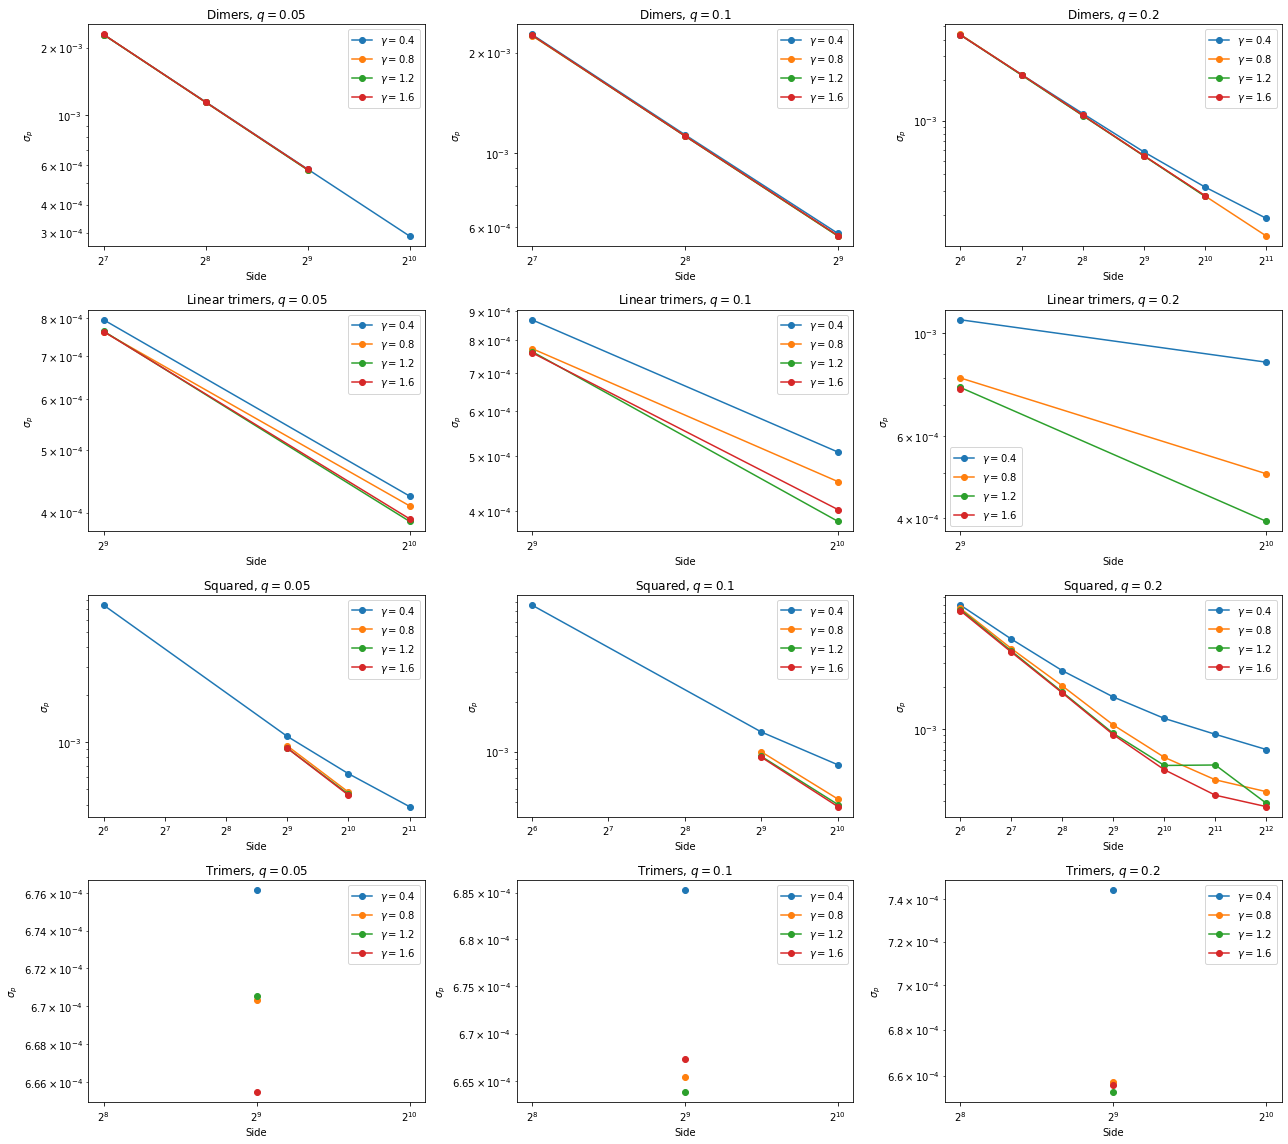

In [ ]:
filtered_data = data[ np.vectorize( lambda d: ( d['gamma'] in [0.4, 0.8, 1.2, 1.6] ) and ( d['defects_frac'] in [0.05, 0.1, 0.2] ) )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        filtered_data[d]['fits']['Gauss']['pars'][1]
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c}$" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( "Side" ),
        plt.ylabel( fr"$\sigma_p$" ),
    )
)

plt.tight_layout()
plt.savefig( savedir + '/sigma_size.pdf' )
plt.savefig( savedir + '/sigma_size.png' )

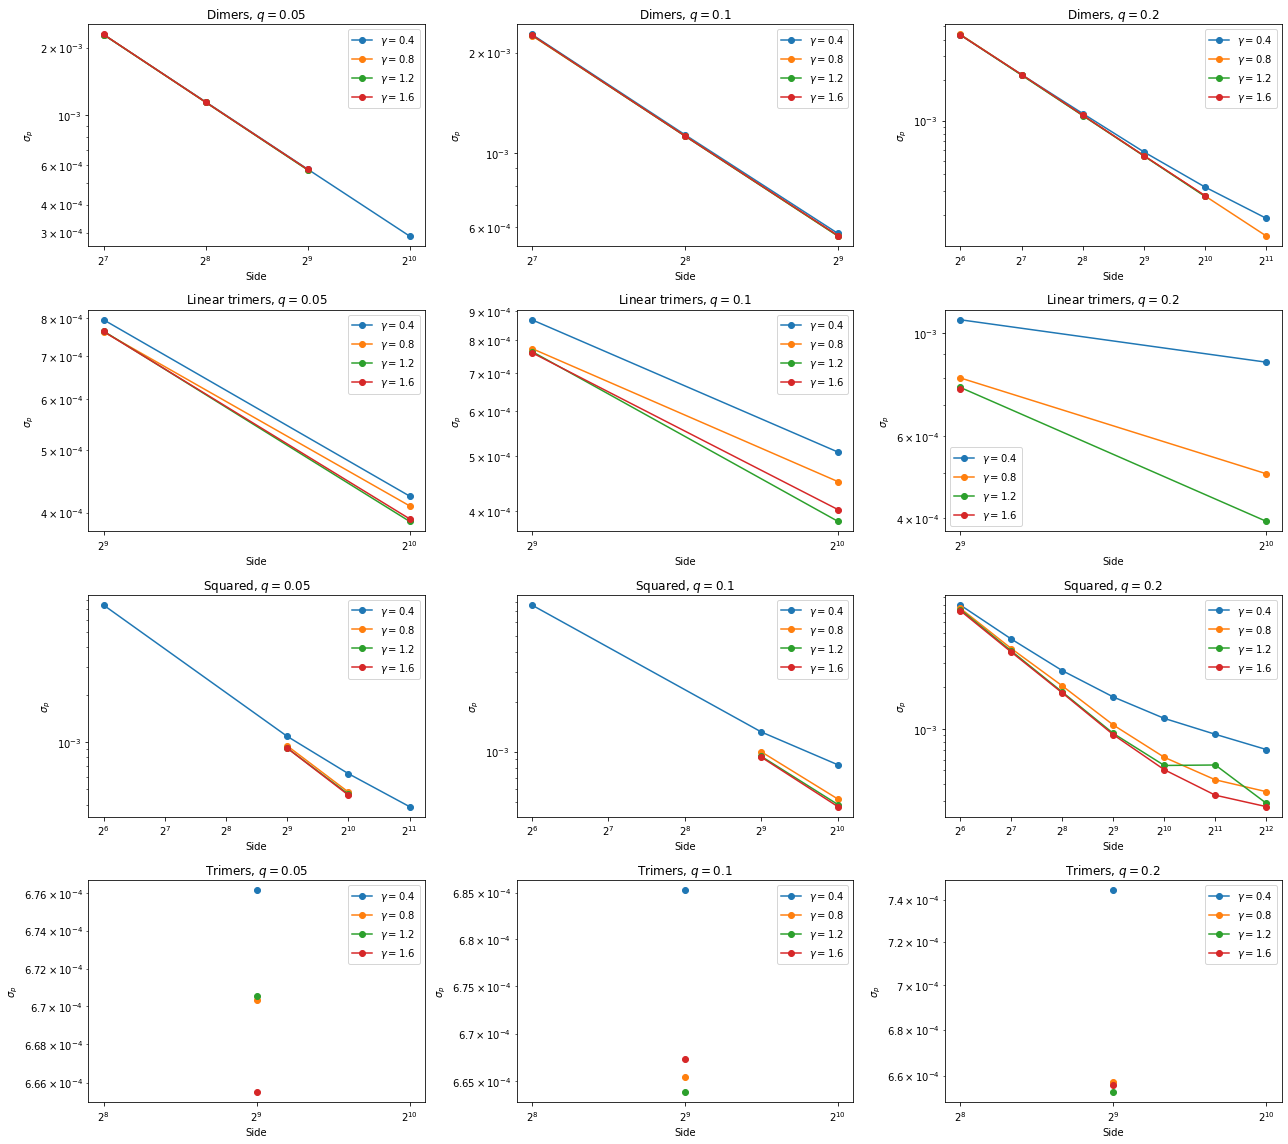

In [ ]:
filtered_data = data[ np.vectorize( lambda d: ( d['gamma'] in [0.4, 0.8, 1.2, 1.6] ) and ( d['defects_frac'] in [0.05, 0.1, 0.2] ) )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['side'],
    lambda d: [
        filtered_data[d]['np_std']
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': 'o' }
    ],
    lambda r, c: (
        plt.title( fr"{r}, $q = {c}$" ),
        plt.xscale( 'log', basex = 2 ),
        plt.yscale( 'log', basey = 10 ),
        plt.xlabel( "Side" ),
        plt.ylabel( fr"$\sigma_p$" ),
    )
)

plt.tight_layout()
plt.savefig( savedir + '/sigma_size_np.pdf' )

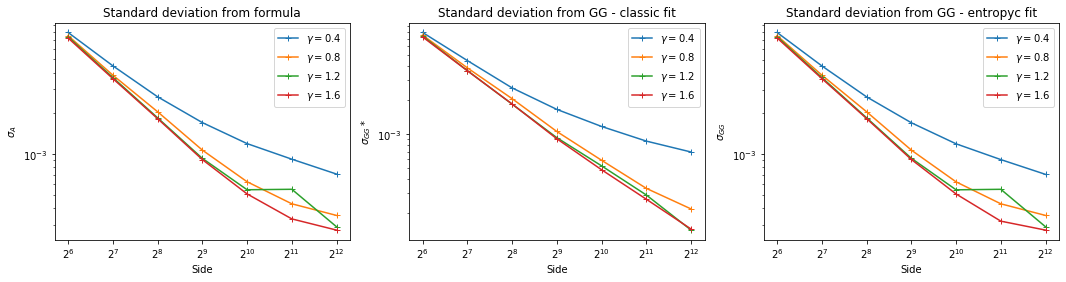

In [10]:
filtered_data = data[ np.vectorize( lambda d: ( d['gamma'] in [0.4, 0.8, 1.2, 1.6] ) and ( d['defects_frac'] in [0.2] ) and ( d['dep_polymers'] == 'Squared' ) )(data) ]

gammas = np.unique( [ d['gamma'] for d in filtered_data ] )
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Ways of Computing Sigma
WoCS = [
    { 'name': 'Standard deviation from formula', 'label': fr"$\sigma_A$", 'formula': lambda d: d['np_std'] },
    { 'name': 'Standard deviation from GG - classic fit', 'label': r"$\sigma_{GG}*$", 'formula': lambda d: d['old_fits']['GG']['pars'][2] },
    # { 'name': 'Standard deviation from Gaussian classic fit', 'label': fr"$\sigma_G*$", 'formula': lambda d: d['old_fits']['Gauss']['pars'][2] }
    { 'name': 'Standard deviation from GG - entropyc fit', 'label': r"$\sigma_{GG}$", 'formula': lambda d: d['fits']['GG']['pars'][1] },
    # { 'name': 'Standard deviation from Gaussian fit', 'label': fr"$\sigma_G$", 'formula': lambda d: d['fits']['Gauss']['pars'][1] },
]

splt.init( 1, len( WoCS ) )
for woc in WoCS:
    splt.next()
    all_x = set()

    for i_g, g in enumerate( gammas ):
        temp_x = []
        temp_y = []
        for d in filtered_data:
            if( d['gamma'] == g ):
                temp_x.append( d['side'] )
                temp_y.append( woc['formula']( d ) )
                all_x.add( d['side'] )

        sort_idx = np.argsort( temp_x )
        x = np.array( temp_x )[ sort_idx ]
        y = np.array( temp_y )[ sort_idx ]

        if( len( y ) > 0 ):
            plt.loglog( x, y, color = color_list[ i_g ], label = fr"$\gamma = {g:.1f}$", ls = '-', marker = '+', basex = 2 )

    plt.legend()
    plt.xticks( list( all_x ) )
    plt.xlabel( 'Side' )
    plt.ylabel( woc['label'] )
    plt.title( woc['name'] )

plt.savefig( savedir + '/sigma_comparisons.pdf')
plt.savefig( savedir + '/sigma_comparisons.png')

In [9]:
for d in all_data:
    if( d['side'] == 2**11 ):
        if( d['gamma'] == 1.2 ):
            if( d['defects_frac'] == 0.2 ):
                if( d['dep_polymers'] == 'Squared' ):
                    print( d['save_path'] )

20220331LowResSquaredscan_20220411/f_14
